1. Import Libraries

In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2. Detect Face, Hand and Pose Landmarks

In [9]:
mp_holistic = mp.solutions.holistic # Holistic model (used for making detections)
mp_drawing = mp.solutions.drawing_utils # Drawing utilities (used to draw the detections)

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0) # capturing our webcam
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): # double checking our webcam
        # Read feed
        ret, frame = cap.read()
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)
    
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release() # release our webcam
    cv2.destroyAllWindows() # close down our frame
    
    cv2.waitKey(1)

I0000 00:00:1732385672.983096 1082387 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1732385673.122225 1103086 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732385673.148175 1103093 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732385673.151405 1103086 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732385673.151851 1103093 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732385673.153027 1103087 inference_feedback_manager.cc:114] Feedback manager requires a mod

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


2024-11-23 23:44:34.063 python[30148:1082387] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-23 23:44:34.063 python[30148:1082387] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

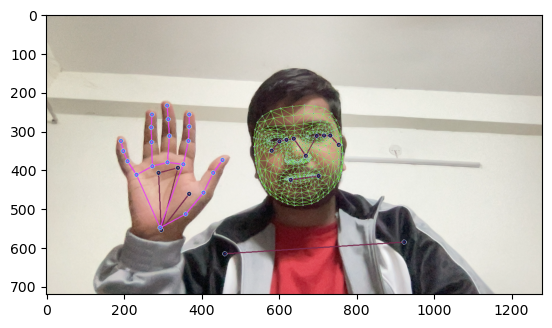

In [13]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 

3.Extract Keypoints

In [21]:
len(results.face_landmarks.landmark)

468

In [23]:
pose = [] # Above code written in loop for future convenience
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [25]:
# Same code as above
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z,] for res in results.left_hand_landmarks.landmark]) if results.left_hand_landmarks else np.zeros(63)
rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)

In [27]:
face.shape # Here we have 468 landmarks with 3 values (i.e, x,x,z )

(1404,)

In [29]:
def extract_keypoints(results): # All the above code is written in function
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [31]:
extract_keypoints(results)

array([ 0.52368909,  0.50604904, -0.783261  , ...,  0.15108977,
        0.45395613, -0.03117431])

In [33]:
extract_keypoints(results).shape

(1662,)

4.Setting up folders for data collection 

In [36]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveu'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

Firstly we have created the data path, the place where we are going to store the data.
Then we have created an action variable which represent each different action.
So, we are collecting 30 videos each of 30 frames in length multiplied by 1662 keypoints.

In [39]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In the above code, we have created an folder namely MP_Data and within that folder we have created subfolders from (0, 1, 2, ... , 29).

5. Collecting keypoints/ Data for training

Now we will be going to loop through and specifically take a snapshot at each point in time we are going to loop through each one our actions to do so rather than looping consistenly through our webcam
then we are going to collect our actions and then we are going to loop through and collect set of frames per videos
so, we are collecting 30 frames per videos and we are going to collect 30 videos and then we are going to do that 3 times for each action

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic (This allow us to take a break between the image collection so it gives us a time to get into postion)
 
                if frame_num == 0: # The below 2 lines are outputting the text to screen
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints to numpy arrayrs
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

6.Pre-prossesing data and creating labels and features


Here we will be importing new dependencies and create label map.
Then we will be reading our data from all of our different numpy arrays.
Then we will be creating our x and y variables where we will be setting up our training and testing partition. 

In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

-> train_test_split fuction is going to allow us to divide our data into a training partition in a testing patitiion.
So, this is just going to allow us to train on one partition and test it out on different segment of our data.


-> to_catagorical is usful when we have got one hot or to convert our data into one hot encoded data.

In [47]:
label_map = {label:num for num, label in enumerate(actions)}

In [48]:
label_map

{'hello': 0, 'thanks': 1, 'iloveu': 2}

Now we will bring our data and structure it. 

So, we are going to have 90 arrays with 30 frames in each one of those arrays of 1662 values which represent our keypoints.

In [144]:
sequences, labels = [], [] # Use our features and train our data to represent the relation between ur labels
for action in actions:
    for sequence in range(no_sequences):
        window = [] # It represent all of the different frames that we have got for particular sequence
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [145]:
np.array(sequences).shape # 30 videos with 30 frames each and each one have those 1662 keypoints

(90, 30, 1662)

In [146]:
np.array(labels).shape

(90,)

In [147]:
x = np.array(sequences)

In [148]:
x.shape

(90, 30, 1662)

In [154]:
y = to_categorical(labels).astype(int) # Converted our labels into encoded forms

Now we will perform our training and testing partions wiz done by train_test_split function

In [157]:
y.shape

(90, 3)

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [161]:
x_test.shape

(5, 30, 1662)

7.Build and Train an LSTM Neural network (Deep Learning Model)

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

-> Sequential function will be allowing us to build sequential neural network

-> ( LSTM, Dense ) is going to be our LSTM layer, this will give us the temporal component to building our neural network and allows us to perform action detection then we passed through dense which is a normal fully connected layer.

-> TensorBoard will allow us to perform logging inside of tensorboard, if we wanted to go, trace and monitorour model as its training.

In [167]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [169]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [170]:
actions.shape[0]

3

In [171]:
res =[0, 1, 0]

In [175]:
actions[np.argmax(res)]

'thanks'

In [177]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [179]:
#(model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback]))

In [181]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,675 (2.28 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

8.Predictions

In [184]:
res = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


In [185]:
actions[np.argmax(res[4])]

'hello'

In [186]:
actions[np.argmax(y_test[4])]

'hello'

9. Save Model Weights

In [188]:
model.save('action.keras')

10. Evaluation using a Confusion Matrix

Here we will be importing couples of matrics from sklearn to evaluate the performance of our model.

In [195]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [197]:
yhat = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [199]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [201]:
multilabel_confusion_matrix(ytrue, yhat) # A confusion matrix is a table used to evaluate the performance our model

array([[[0, 0],
        [0, 5]]])

In [203]:
accuracy_score(ytrue, yhat)

1.0

11. Real Time Test

In [ ]:
# 1. New detection variables 
sequence = []
sentence = []
threshold = 0.5
cap = cv2.VideoCapture(0) # capturing our webcam

# Set Mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():  # double checking our webcam
        # Read feed
        ret, frame = cap.read()
    
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction Logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]

        res = None  # Initialize `res` to avoid issues if prediction is skipped
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]  # Predict one sequence
            print("Predictions:", res)
            print("Predicted Action:", actions[np.argmax(res)])
       
        # 3. Visualization Logic
        if res is not None and res[np.argmax(res)] > threshold:
            if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5: 
            sentence = sentence[-5:]
        
        # Display sentence
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
    
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()  # release webcam
    cv2.destroyAllWindows()  # close frame
    cv2.waitKey(1)